<a href="https://colab.research.google.com/github/infinitebhat/Lean_Manufacturing/blob/main/Kanban_cards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import math

Consider a line of flow as shown below.


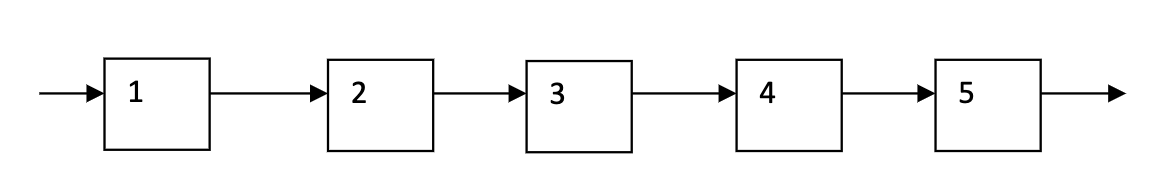

In [1]:
from IPython.display import Image
Image(filename='/content/Line of Flow.png') 

The following table provides all the information need for designing Kanban control or Conwip control on this line. All times are in minutes.

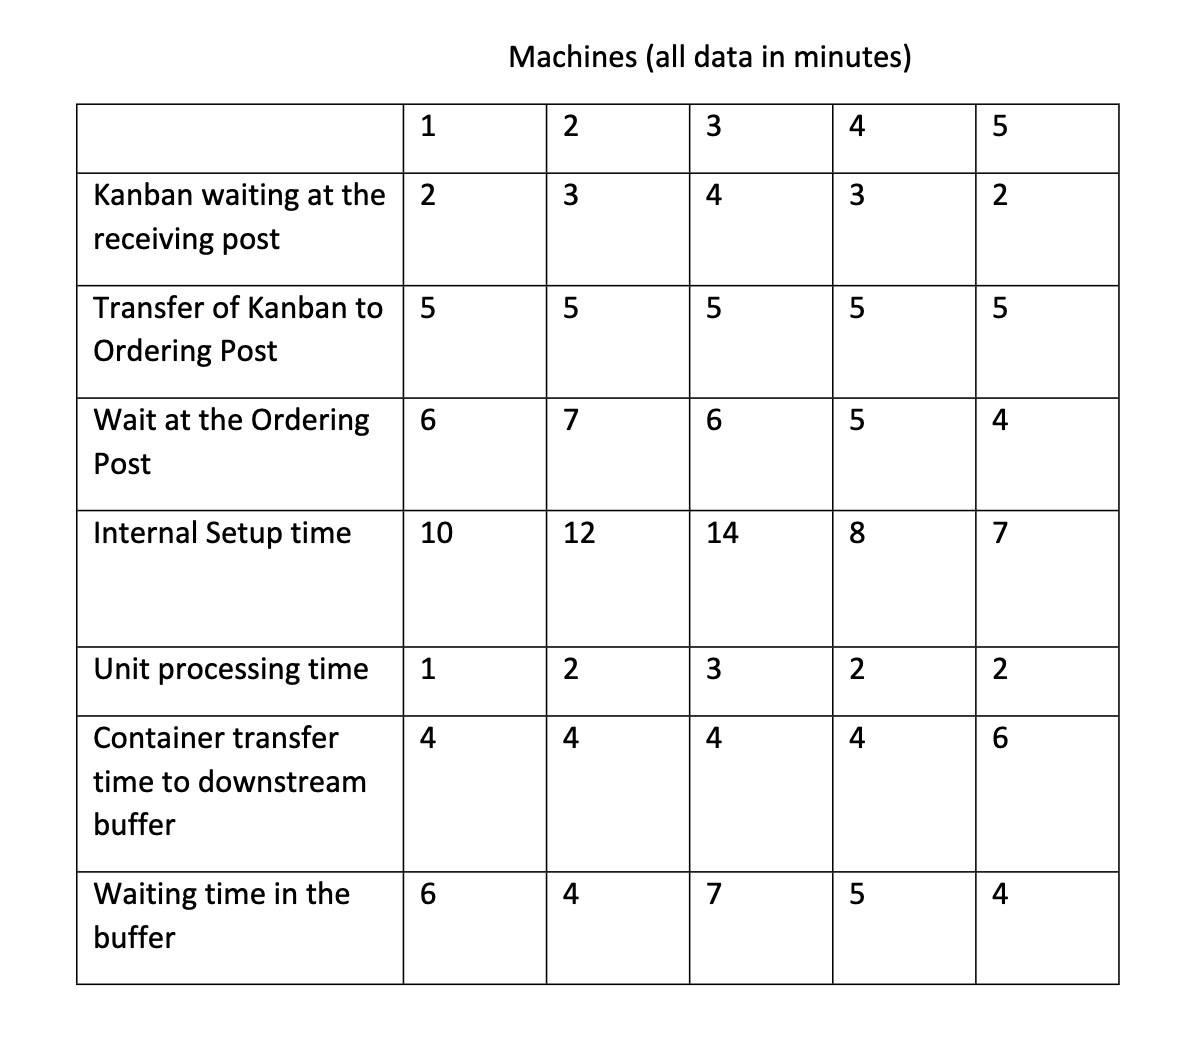

In [2]:
from IPython.display import Image
Image(filename='/content/table.png')

The daily demand is known to be 400 units per day. It is also known that the batch size for this line is 25 units per container. The line operates 24 hours each day without breaks.


a)    Calculate the needed number of Kanban cards if each station will be controlled by Kanban. Use 10% safety factor.


b)    If the entire line is to be controlled by Conwip system what should be the number of cards needed. For this, use 10% safety factor, and assume the card travel time from machine 5 to machine 1 is 10 minutes.



c)Which machine is the bottleneck machine on this line? Why?


d)    Now assume that we will implement DBR technique to this line. I.e., the machines from Machine #1 to the bottleneck machine (inclusive) will be controlled by Conwip. Once the batch clears the bottleneck machine, it will travel the remaining machines in a push fashion without any delay (pull-push system). Calculate the number of cards needed on the Conwip side of the line. Again, use 10% for safety factor and assume that the card transfer time from your bottleneck machine to machine #1 is 10 minutes. 

In [3]:
#Kanban waiting at the receiving post - KWT
#Transfer of Kanban to Ordering Post - TKOP
#Wait at the Ordering Post - WOP
#Internal Setup time-IST
#Unit processing time -PT
#Container transfer time to downstream buffer-DB
#Waiting time in the buffer-WB

In [6]:
daily_demand=400
batch_size=25
op_time=24

KWT=[2,3,4,3,2]
TKOP=[5,5,5,5,5]
WOP=[6,7,6,5,4]
IST=[10,12,14,8,7]
PT=[1,2,3,2,2]
DB=[4,4,4,4,6]
WTB=[6,4,7,5,4]

data= np.array([KWT,TKOP,WOP,IST,PT, DB,WTB])
print(data)

[[ 2  3  4  3  2]
 [ 5  5  5  5  5]
 [ 6  7  6  5  4]
 [10 12 14  8  7]
 [ 1  2  3  2  2]
 [ 4  4  4  4  6]
 [ 6  4  7  5  4]]


In [10]:
cycle_time_list=[]
nums_kanban_list=[]

for i in range(0,5):
  cycle_time=data[0,i] +data[1,i]+data[2,i]+data[3,i]+(batch_size*data[4,i])+data[5,i]+data[6,i]
  cycle_time_list.append(cycle_time)

for j in range(0,len(cycle_time_list)):
  nums_kanban= ((daily_demand/(op_time*60))*(1+0.1)*cycle_time_list[j])/batch_size
  nums_kanban_list.append(math.ceil(nums_kanban))

print("cycle times = "+str(cycle_time_list))
print("nums of kanban cards ="+ str(nums_kanban_list))
print()

cycle times = [58, 85, 115, 80, 78]
nums of kanban cards =[1, 2, 2, 1, 1]

